#Scipy#

##SciPy (Scientific Python)

SciPy is an open-source Python library used for scientific computing and technical computing. It builds on the NumPy array object and is part of the NumPy stack which includes tools like Matplotlib, Pandas, and SymPy.

```python
import scipy as sp
```

### SciPy Subpackages

SciPy is organized into subpackages covering different scientific computing domains. Here's a list of major SciPy subpackages:

#### scipy.cluster

Clustering algorithms

- `scipy.cluster.vq`: Vector quantization / Kmeans
- `scipy.cluster.hierarchy`: Hierarchical clustering

#### scipy.constants

Physical and mathematical constants

- `scipy.constants.physical_constants`: Dictionary of physical constants
- `scipy.constants.unit`: Units and unit conversion

#### scipy.fft

Fast Fourier Transform routines

- `scipy.fft.fft`: Compute the one-dimensional discrete Fourier Transform
- `scipy.fft.ifft`: Compute the one-dimensional inverse discrete Fourier Transform

#### scipy.integrate

Integration and ordinary differential equation solvers

- `scipy.integrate.quad`: Integrate a function of one variable
- `scipy.integrate.odeint`: Integrate ordinary differential equations

#### scipy.interpolate

Interpolation tools

- `scipy.interpolate.interp1d`: Interpolate a 1-D function
- `scipy.interpolate.splrep`: Find the B-spline representation of a 1-D curve

#### scipy.io

Data input and output

- `scipy.io.loadmat`: Load MATLAB files
- `scipy.io.savemat`: Save arrays as MATLAB files

#### scipy.linalg

Linear algebra routines

- `scipy.linalg.inv`: Compute the inverse of a matrix
- `scipy.linalg.svd`: Singular Value Decomposition

#### scipy.ndimage

N-dimensional image processing

- `scipy.ndimage.filters`: Multidimensional filters
- `scipy.ndimage.interpolation`: Multidimensional image interpolation

#### scipy.optimize

Optimization and root finding routines

- `scipy.optimize.minimize`: Minimization of scalar function of one or more variables
- `scipy.optimize.curve_fit`: Use non-linear least squares to fit a function to data

#### scipy.signal

Signal processing tools

- `scipy.signal.convolve`: Convolve two N-dimensional arrays
- `scipy.signal.filtfilt`: A forward-backward filter

#### scipy.sparse

Sparse matrices and associated routines

- `scipy.sparse.csr_matrix`: Compressed Sparse Row matrix
- `scipy.sparse.linalg`: Linear algebra routines for sparse matrices

#### scipy.spatial

Spatial data structures and algorithms

- `scipy.spatial.distance`: Distance computations
- `scipy.spatial.KDTree`: K-D Tree for quick nearest-neighbor lookup

#### scipy.special

Special functions

- `scipy.special.gamma`: Gamma function
- `scipy.special.erf`: Error function

#### scipy.stats

Statistical distributions and functions

- `scipy.stats.norm`: Normal (Gaussian) distribution
- `scipy.stats.ttest_ind`: Calculate the T-test for the means of two independent samples of scores

### Common SciPy Functions

Here are some commonly used SciPy functions across various subpackages:

#### Optimization

- `scipy.optimize.minimize(fun, x0, method='BFGS', jac=None)`: Minimization of scalar function of one or more variables
  - fun: Objective function to be minimized
  - x0: Initial guess
  - method: Type of solver
  - jac: Method for computing the gradient vector

#### Linear Algebra

- `scipy.linalg.solve(a, b)`: Solve the equation a x = b for x
  - a: Square matrix
  - b: Right-hand side vector or matrix

#### Integration

- `scipy.integrate.quad(func, a, b)`: Compute a definite integral
  - func: Function to integrate
  - a: Lower limit of integration
  - b: Upper limit of integration

#### Signal Processing

- `scipy.signal.find_peaks(x, height=None, threshold=None, distance=None)`: Find peaks inside a signal based on peak properties
  - x: A 1-D array
  - height: Required height of peaks
  - threshold: Required threshold of peaks
  - distance: Required minimal horizontal distance between neighbouring peaks

#### Statistics

- `scipy.stats.ttest_ind(a, b, equal_var=True)`: Calculate the T-test for the means of two independent samples of scores
  - a: Sample 1
  - b: Sample 2
  - equal_var: If True (default), perform a standard independent 2 sample test that assumes equal population variances

### Parameters

- fun, func: Function to be optimized, integrated, etc.
- x0: Initial guess or starting point for optimization
- a, b: Input arrays, matrices, or integration limits
- method: Specific algorithm to use in optimization or other processes
- jac: Jacobian (gradient) of the function
- height, threshold, distance: Parameters for peak finding in signal processing
- equal_var: Boolean for assuming equal variances in statistical tests

##Code Demonstration##

In [ ]:

import numpy as np
import scipy as sp
import scipy.stats as stats
import scipy.optimize as optimize
import scipy.linalg as linalg
import scipy.integrate as integrate
import scipy.signal as signal
import scipy.interpolate as interpolate
import scipy.fft as fft
import matplotlib.pyplot as plt

# Constants
print("Value of pi:", sp.constants.pi)

# Optimization
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = optimize.minimize(rosen, x0, method='nelder-mead')
print("Optimization result:", res.x)  # Print the optimal solution

# Linear Algebra
A = np.array([[1,2],[3,4]])
b = np.array([5,6])
x = linalg.solve(A, b)
print("Solution to Ax=b:", x)  # Solve the linear system Ax = b

# Integration
def f(x):
    return x**2

integral, error = integrate.quad(f, 0, 1)
print("Integral of x^2 from 0 to 1:", integral)  # Compute the integral of x^2 from 0 to 1

# Signal Processing
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
# filtered = signal.filtfilt(b=[0.1], a=[1], x=sig)  # Apply a simple low-pass filter
filtered = signal.filtfilt(b=[0.1], a=[1, 0], x=sig)
peaks, _ = signal.find_peaks(filtered, height=0)
print("Number of peaks found:", len(peaks))  # Find peaks in the filtered signal

# Statistics
a = np.random.normal(0, 1, 1000)
b = np.random.normal(1, 1, 1000)
t_stat, p_value = stats.ttest_ind(a, b)
print("T-test p-value:", p_value)  # Perform a t-test

# Interpolation
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)
print("Interpolated value at x=2.5:", f(2.5))  # Interpolate the value at x=2.5

# FFT
X = fft.fft(sig)
freqs = fft.fftfreq(len(t), t[1] - t[0])
plt.plot(freqs, np.abs(X))
plt.title("FFT of signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.savefig("fft_plot.png")
plt.close()

# Clustering (from scipy.cluster)
from scipy.cluster.vq import kmeans, vq
data = np.random.randn(100, 2)
centroids, _ = kmeans(data, 2)
labels, _ = vq(data, centroids)
print("Number of points in each cluster:", np.bincount(labels))  # Perform K-means clustering

# Sparse matrices (from scipy.sparse)
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix((3, 4), dtype=np.int8)
sparse_matrix[0, 0] = 1
sparse_matrix[1, 1] = 2
sparse_matrix[2, 3] = 3
print("Sparse matrix:\n", sparse_matrix.toarray())  # Create and print a sparse matrix

# Special functions (from scipy.special)
from scipy.special import gamma, erf
print("Gamma(5):", gamma(5))  # Compute gamma function
print("Error function at 1:", erf(1))  # Compute error function

# Spatial algorithms (from scipy.spatial)
from scipy.spatial import distance
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
distances = distance.pdist(points)
print("Pairwise distances:", distances)  # Compute pairwise distances between points

# Image processing (from scipy.ndimage)
from scipy.ndimage import gaussian_filter
image = np.random.rand(10, 10)
smoothed = gaussian_filter(image, sigma=1)
print("Original image sum:", image.sum())
print("Smoothed image sum:", smoothed.sum())  # Apply Gaussian filter to an image

# ODE solver (from scipy.integrate)
def model(y, t, k):
    return -k * y

k = 0.1
y0 = 5.0
t = np.linspace(0, 40, 100)
sol = integrate.odeint(model, y0, t, args=(k,))
plt.plot(t, sol)
plt.title("Solution of dy/dt = -k*y")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("ode_solution.png")
plt.close()

Value of pi: 3.141592653589793
Optimization result: [0.99910115 0.99820923 0.99646346 0.99297555 0.98600385]
Solution to Ax=b: [-4.   4.5]
Integral of x^2 from 0 to 1: 0.33333333333333337
Number of peaks found: 20
T-test p-value: 6.245013144891986e-101
Interpolated value at x=2.5: 0.4406482801020172
Number of points in each cluster: [60 40]
Sparse matrix:
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 0 3]]
Gamma(5): 24.0
Error function at 1: 0.8427007929497148
Pairwise distances: [1.         1.         1.41421356 1.41421356 1.         1.        ]
Original image sum: 50.28031036124093
Smoothed image sum: 50.280310361240936


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
from scipy.optimize import minimize


# Objective function
def objective_function(x):
    return x**2 + 3*x + 2

#Perform optimization
result = minimize(objective_function, x0=0)
print(result.x) # Optimal value of x

[-1.50000001]


In [ ]:
from scipy.optimize import minimize
from scipy.integrate import quad # Import the quad function


def integrand(x):
    print(x)
    return x**2

# Compute the integral (curve of x**2)
result, error = quad(integrand, 0, 1)

print(result) # Integral result

0.5
0.013046735741414128
0.9869532642585859
0.06746831665550773
0.9325316833444923
0.16029521585048778
0.8397047841495122
0.2833023029353764
0.7166976970646236
0.4255628305091844
0.5744371694908156
0.002171418487095955
0.997828581512904
0.03492125432214588
0.9650787456778541
0.10959113670679155
0.8904088632932085
0.21862143266569767
0.7813785673343023
0.35280356864926987
0.6471964313507301
0.33333333333333337


In [ ]:
from scipy.linalg import inv, det

import numpy as np

#Define a matrix
matrix = np.array([[1, 2], [3, 4]])

#Compute the determinant of the matrix
matrix_det = det(matrix)
print(matrix_det)

-2.0


In [ ]:
from scipy.interpolate import interp1d

import numpy as np

#Known data points
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 4, 9])

# Create interpolation function
f = interp1d(x, y, kind='linear')

# Interpolate a new value
new_x = 2.5
interpolated_value = f(new_x)
print(interpolated_value) # Interpolated value

6.5



Assignment 1
Finding the Inverse of a Matrix - Use scipy.linalg.inv
Given matrix:
Don't use

    A =| 4 7 |
       | 2 6 |

In [ ]:
import numpy as np
from scipy import linalg

x = np.array([[4, 7], [2, 6]])
invx = linalg.inv(x)
print('Inverse of x=\n', x, '\n is xinv=\n' , invx)

Inverse of x=
 [[4 7]
 [2 6]] 
 is xinv=
 [[ 0.6 -0.7]
 [-0.2  0.4]]


#Matplotlib#

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides a MATLAB-like interface, especially when used with NumPy.

```python
import matplotlib.pyplot as plt
```

### Core Concepts

#### Figure and Axes

- `Figure`: The top-level container for all plot elements.
- `Axes`: The area where data is plotted. A figure can contain multiple axes.

#### Plotting Functions

- `plt.plot()`: Create a line plot
- `plt.scatter()`: Create a scatter plot
- `plt.bar()`: Create a bar plot
- `plt.hist()`: Create a histogram
- `plt.imshow()`: Display an image

#### Customization

- `plt.title()`: Set the title of the plot
- `plt.xlabel()`, `plt.ylabel()`: Set axis labels
- `plt.legend()`: Add a legend to the plot
- `plt.grid()`: Add grid lines to the plot

#### Saving and Displaying

- `plt.show()`: Display the plot
- `plt.savefig()`: Save the plot to a file

### Common Matplotlib Functions

#### Basic Plotting

- `plt.plot(x, y, color='r', linestyle='-', marker='o')`: Create a line plot
  - x, y: Data points
  - color: Color of the line
  - linestyle: Style of the line ('-', '--', ':', '-.')
  - marker: Marker style ('o', 's', '^', etc.)

- `plt.scatter(x, y, s=None, c=None, marker=None)`: Create a scatter plot
  - x, y: Data points
  - s: Size of markers
  - c: Color of markers
  - marker: Marker style

#### Statistical Plots

- `plt.hist(x, bins=None, range=None, density=False)`: Create a histogram
  - x: Input data
  - bins: Number of bins or bin edges
  - range: Lower and upper range of bins
  - density: If True, plot density instead of counts

- `plt.boxplot(x, notch=None, sym=None, vert=None)`: Create a box plot
  - x: Input data
  - notch: If True, create notched box plots
  - sym: Symbol for flier points
  - vert: If True, create a vertical box plot

#### Image Plotting

- `plt.imshow(X, cmap=None, norm=None, aspect=None)`: Display an image
  - X: Image data
  - cmap: Colormap
  - norm: Normalization scaling
  - aspect: Aspect ratio of the axes

#### 3D Plotting

- `fig.add_subplot(111, projection='3d')`: Create a 3D axes
- `ax.plot3D(x, y, z)`: Plot a 3D line
- `ax.scatter3D(x, y, z)`: Create a 3D scatter plot

#### Subplots

- `plt.subplots(nrows=1, ncols=1)`: Create a figure and a set of subplots

#### Customization

- `plt.title(label, fontdict=None, loc=None)`: Set the title of the plot
- `plt.xlabel(xlabel, fontdict=None, labelpad=None)`: Set the label for the x-axis
- `plt.ylabel(ylabel, fontdict=None, labelpad=None)`: Set the label for the y-axis
- `plt.legend(handles=None, labels=None, loc=None)`: Add a legend to the plot
- `plt.grid(b=None, which='major', axis='both')`: Configure the grid lines

#### Colormaps and Color Bars

- `plt.colorbar(mappable=None, cax=None, ax=None)`: Add a colorbar to a plot

Now, let's create a Python script that demonstrates various Matplotlib functions:

##Code Demonstration ##

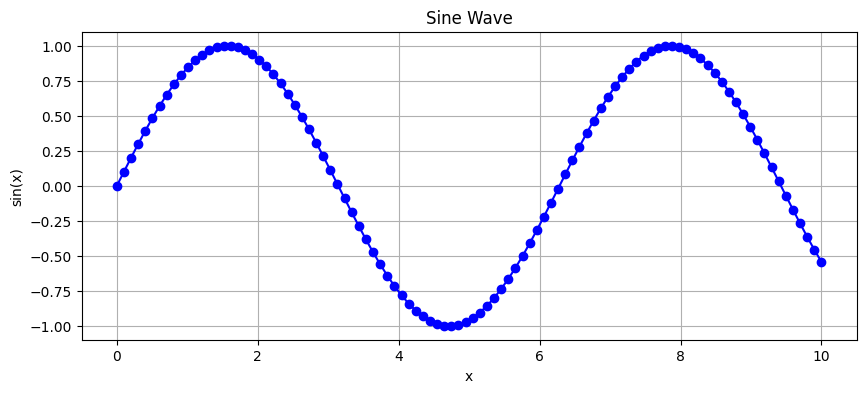

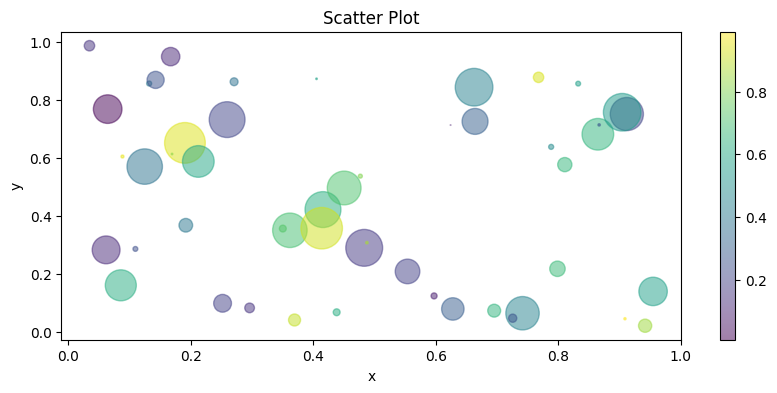

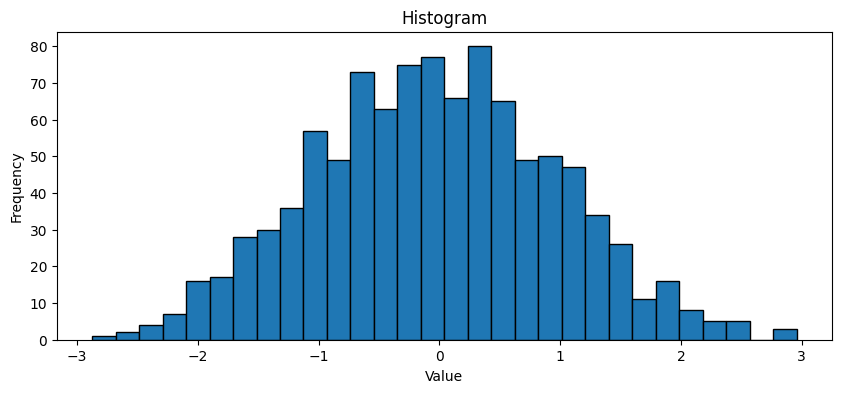

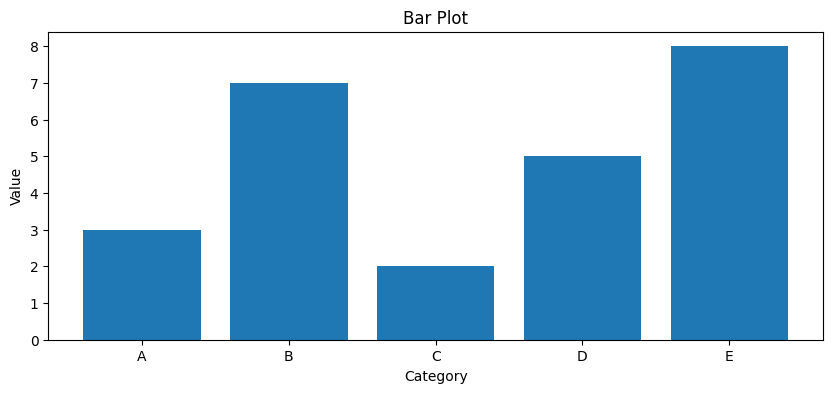

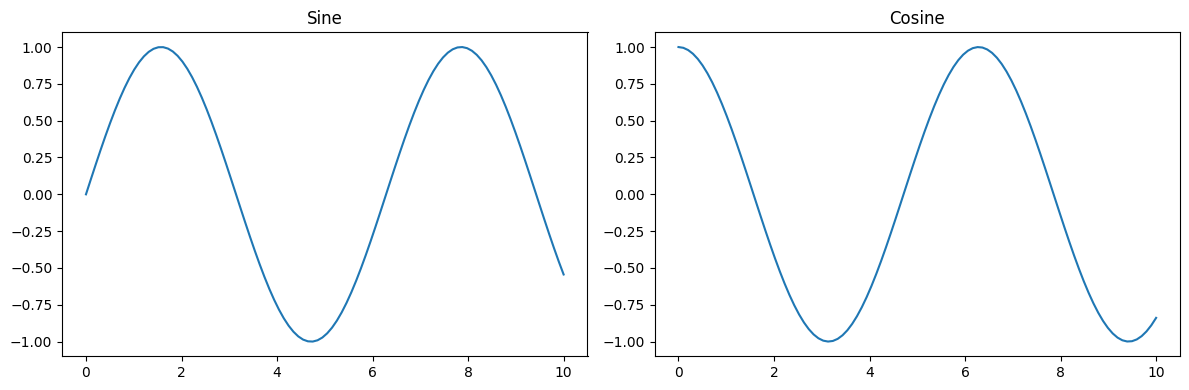

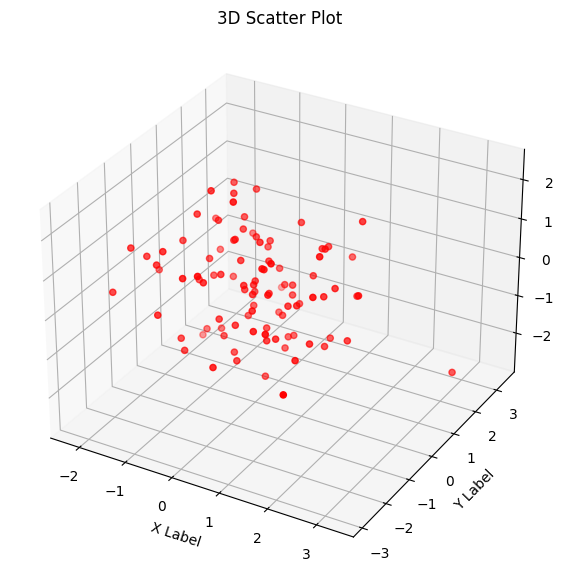

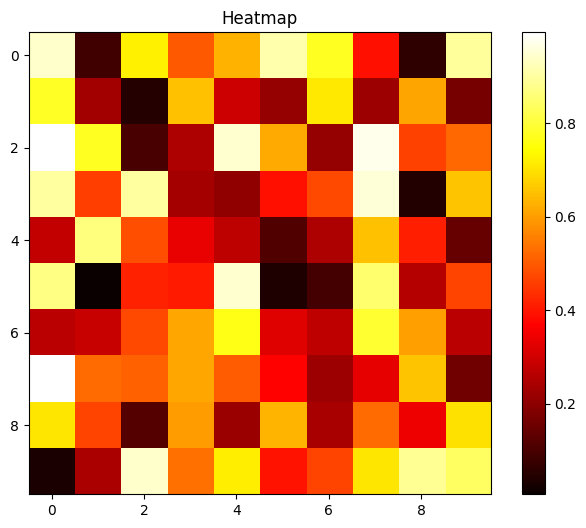

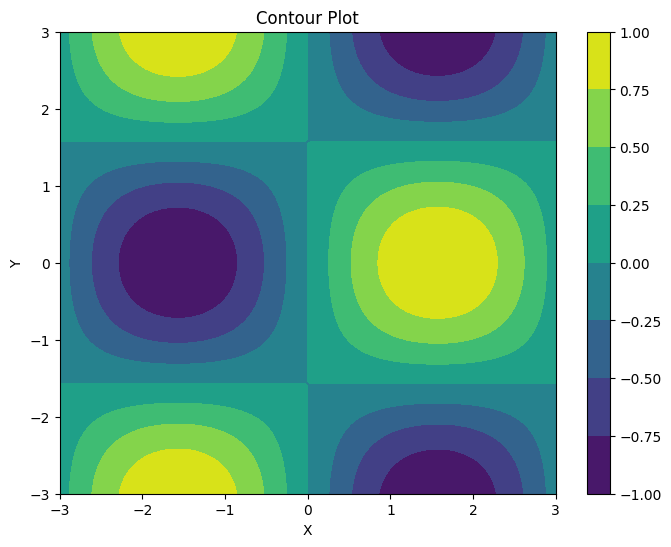

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Basic Line Plot
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.figure(figsize=(10, 4))
plt.plot(x, y, color='b', linestyle='-', marker='o')
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()
#plt.savefig('line_plot.png')
plt.close()

# Scatter Plot
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
area = (30 * np.random.rand(n))**2
plt.figure(figsize=(10, 4))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()
#plt.savefig('scatter_plot.png')
plt.close()

# Histogram
data = np.random.randn(1000)
plt.figure(figsize=(10, 4))
plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('histogram.png')
plt.close()

# Bar Plot
categories = ['A', 'B', 'C', 'D', 'E']
values = [3, 7, 2, 5, 8]
plt.figure(figsize=(10, 4))
plt.bar(categories, values)
plt.title('Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()
#plt.savefig('bar_plot.png')
plt.close()

# Multiple Plots
x = np.linspace(0, 10, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(x, np.sin(x))
ax1.set_title('Sine')
ax2.plot(x, np.cos(x))
ax2.set_title('Cosine')
plt.tight_layout()
plt.show()
#plt.savefig('multiple_plots.png')
plt.close()

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Scatter Plot')
plt.show()
#plt.savefig('3d_scatter.png')
plt.close()

# Heatmap
data = np.random.rand(10, 10)
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap')
plt.show()
#plt.savefig('heatmap.png')
plt.close()

# Contour Plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Contour Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
#plt.savefig('contour_plot.png')
plt.close()

###Line Plot###

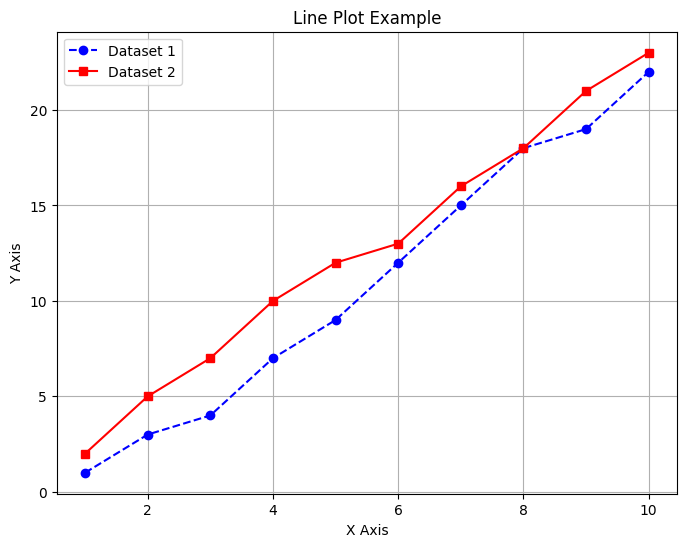

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(1, 11)
y1 = np.array([1, 3, 4, 7, 9, 12, 15, 18, 19, 22])
y2 = np.array([2, 5, 7, 10, 12, 13, 16, 18, 21, 23])

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='Dataset 1', color='blue', marker='o', linestyle='--')
plt.plot(x, y2, label='Dataset 2', color='red', marker='s', linestyle='-')

plt.title('Line Plot Example')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True)
plt.show()

### Bar Chart

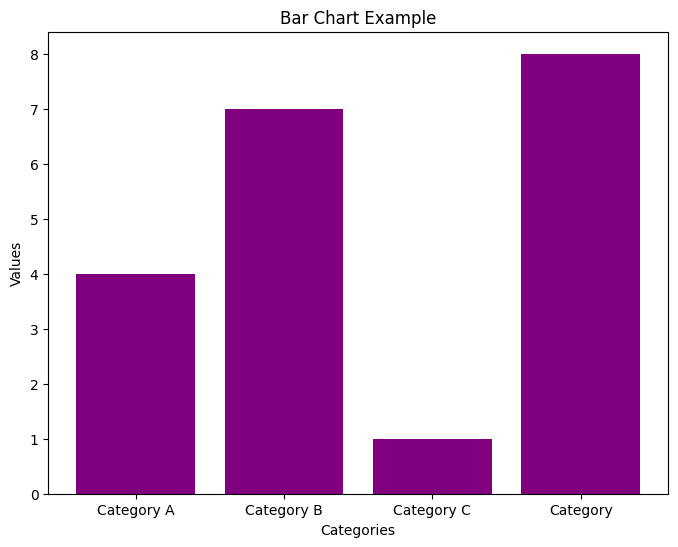

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Category A', 'Category B', 'Category C', 'Category']
values = [4, 7, 1, 8]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='purple')
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

### Scatter plot ###

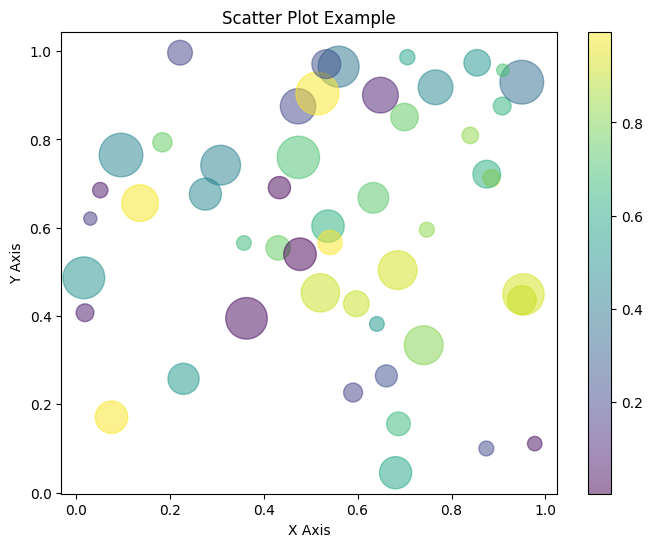

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)
sizes = 1000 * np.random.rand(50)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')

plt.title('Scatter Plot Example')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.colorbar()

plt.show()

###Assignment 1###

* Plot sales data for a year. Use Matplotlib for creating line plots and bar charts and pie charts.

* Generate Synthetic Data:

    * Create a list of months (e.g., January to December).

    * Generate synthetic sales data for each month (e.g., sales values between 50 and 500).

* Visualize the Data:

    * Line Plot:

        * Create a line plot showing the sales data over the months.

        * Add labels for the x-axis, y-axis, and a title to the plot.

    * Bar Chart:

         * Create a bar chart showing the sales data for each month.

         * Add labels for the x-axis, y-axis, and a title to the bar chart.

    * Pie Chart:

        * Create a pie chart showing the proportion of total sales for each month.

        * Add labels and a title to the pie chart.

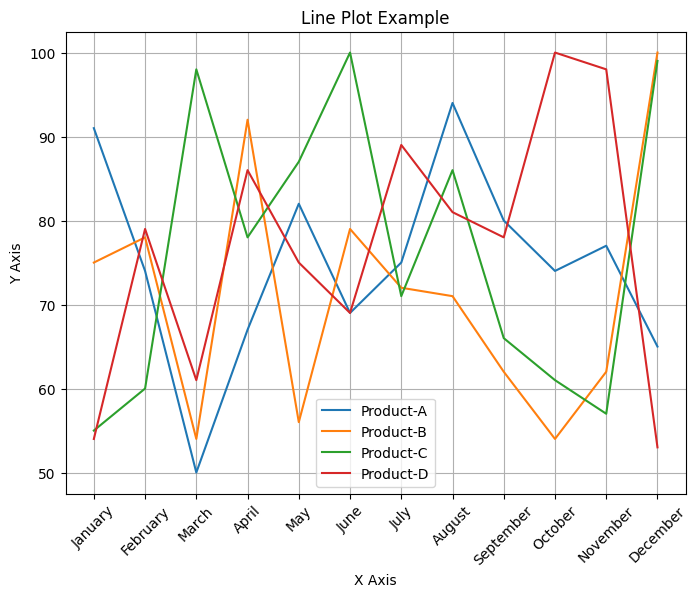

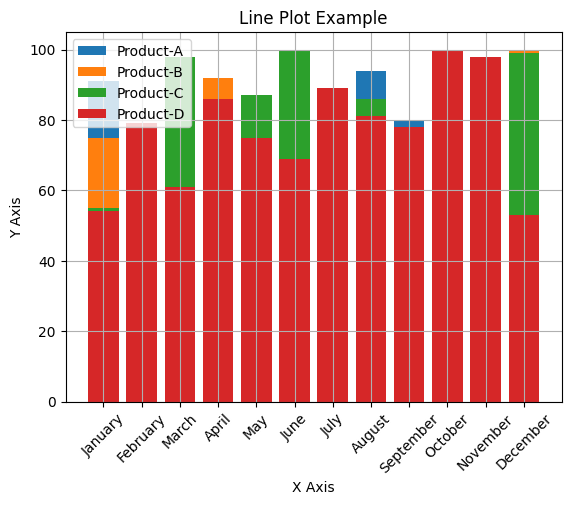

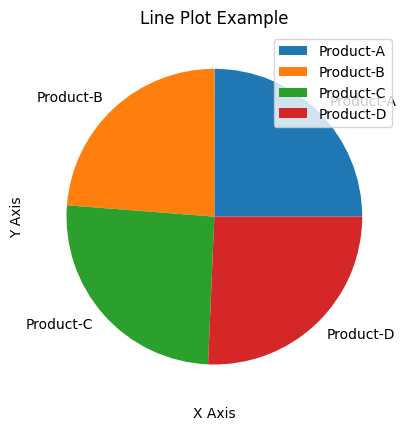

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import calendar
import math

no_of_products = 4
name_of_products = ['Product-'+chr(x+65) for x in range(no_of_products )]

data = {}
for product in name_of_products:
    data[product] = np.random.randint(low=50, high=101, size=12)

months = list(calendar.month_name)[1:]
plt.figure(figsize=(8, 6))

def plot_chart(type_plot):
    for product, sales in data.items():
        type_plot(months, sales, label=product)
    plt.title('Line Plot Example')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

def plot_pie_all(data):
    x_axis = data.keys()
    y_axis = [sale.sum() for sale in data.values()]
    plt.pie(y_axis, labels=x_axis)
    plt.title('Line Plot Example')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

plot_chart(plt.plot)
plot_chart(plt.bar)
plot_pie_all(data)

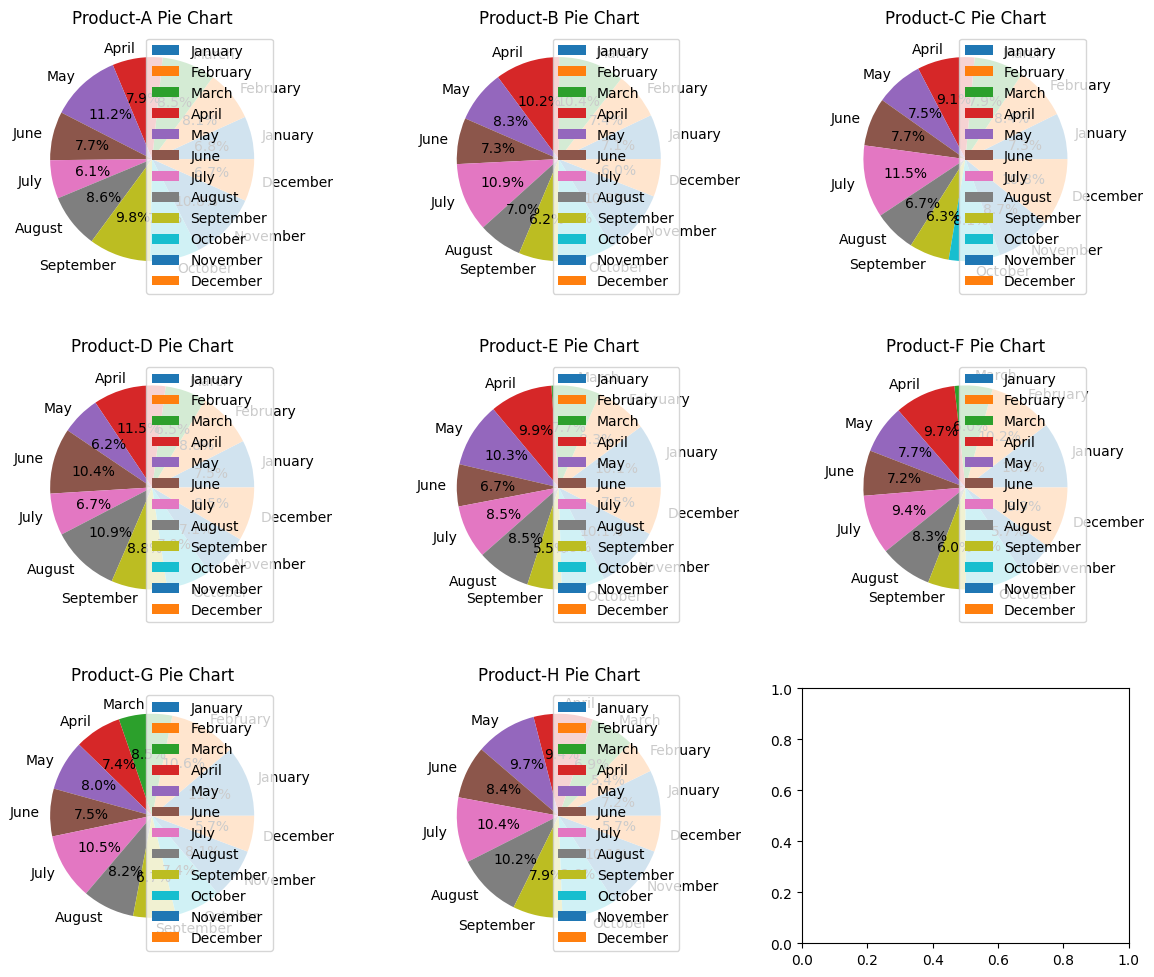

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import calendar

no_of_products = 8
name_of_products = ['Product-'+chr(x+65) for x in range(no_of_products)]
months = list(calendar.month_name)[1:]

data = {}
for product in name_of_products:
    data[product] = np.random.randint(low=50, high=101, size=12)

def plot_pie_distinct(data):
    sub_size = math.ceil(math.sqrt(no_of_products))
    fig, axs = plt.subplots(sub_size, sub_size, figsize=(12, 10))
    i = 0
    j = 0
    for product, sales in data.items():
        axs[i, j].pie(sales, labels=months, autopct='%1.1f%%')
        axs[i, j].set_title(product + ' Pie Chart')
        axs[i, j].legend(loc="upper right")

        j += 1
        if j == sub_size:
            j = 0
            i += 1

    plt.tight_layout()
    plt.show()

plot_pie_distinct(data)
# This can also be donr using axs.flatten()

#Seaborn#


Seaborn is a statistical data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

```python
import seaborn as sns
```

### Core Concepts

#### Plot Types

- Relational plots: `scatterplot()`, `lineplot()`
- Categorical plots: `barplot()`, `boxplot()`, `violinplot()`
- Distribution plots: `histplot()`, `kdeplot()`, `ecdfplot()`
- Regression plots: `regplot()`, `lmplot()`
- Matrix plots: `heatmap()`, `clustermap()`

#### Themes and Styles

- `set_style()`: Set the aesthetic style of the plots
- `set_palette()`: Set the color palette for the plots
- `set_context()`: Set the plotting context parameters

#### Figure-level vs. Axes-level functions

- Figure-level functions (e.g., `lmplot()`) create their own figure
- Axes-level functions (e.g., `scatterplot()`) plot onto a specific axes

### Common Seaborn Functions

#### Relational Plots

- `sns.scatterplot(x, y, hue=None, style=None, size=None, data=None)`: Create a scatter plot
  - x, y: Variables for the x and y axes
  - hue, style, size: Variables for color, marker style, and size encoding
  - data: DataFrame containing the variables

- `sns.lineplot(x, y, hue=None, style=None, data=None)`: Create a line plot

#### Categorical Plots

- `sns.barplot(x, y, hue=None, data=None, estimator=np.mean)`: Create a bar plot
  - estimator: Statistical function to estimate within each categorical bin

- `sns.boxplot(x, y, hue=None, data=None)`: Create a box plot

- `sns.violinplot(x, y, hue=None, data=None)`: Create a violin plot

#### Distribution Plots

- `sns.histplot(data, x=None, y=None, hue=None, kde=False)`: Create a histogram
  - kde: If True, compute a kernel density estimate to smooth the distribution

- `sns.kdeplot(data, x=None, y=None, shade=False)`: Create a kernel density plot
  - shade: If True, shade in the area under the density curve

#### Regression Plots

- `sns.regplot(x, y, data=None, scatter=True)`: Plot data and a linear regression model fit
  - scatter: If True, plot the scatter plot of the data

- `sns.lmplot(x, y, data, hue=None, col=None, row=None)`: Plot data and regression model across a FacetGrid

#### Matrix Plots

- `sns.heatmap(data, annot=None, cmap=None, center=None)`: Create a heatmap
  - annot: If True, write the data value in each cell
  - cmap: The mapping from data values to color space
  - center: The value at which to center the colormap

Now, let's create a Python script that demonstrates various Seaborn functions:

##Code Demonstration##

           x         y category       size     value
0   0.548814  0.677817        C  18.163120 -0.155805
1   0.715189  0.270008        C  51.239346 -0.859512
2   0.602763  0.735194        A  58.044714  2.529012
3   0.544883  0.962189        B  78.754216 -0.844485
4   0.423655  0.248753        B  60.647546  0.890662
..       ...       ...      ...        ...       ...
95  0.183191  0.490459        B   9.226017  1.494331
96  0.586513  0.227415        A  91.054472 -0.825531
97  0.020108  0.254356        A   8.297175 -0.700242
98  0.828940  0.058029        A  80.037846  0.373191
99  0.004695  0.434417        C  87.713097  0.062685

[100 rows x 5 columns]


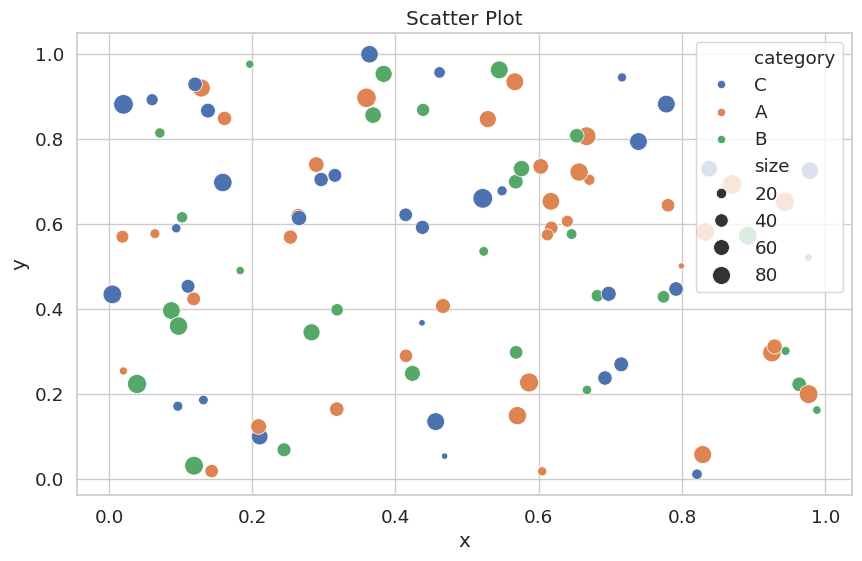

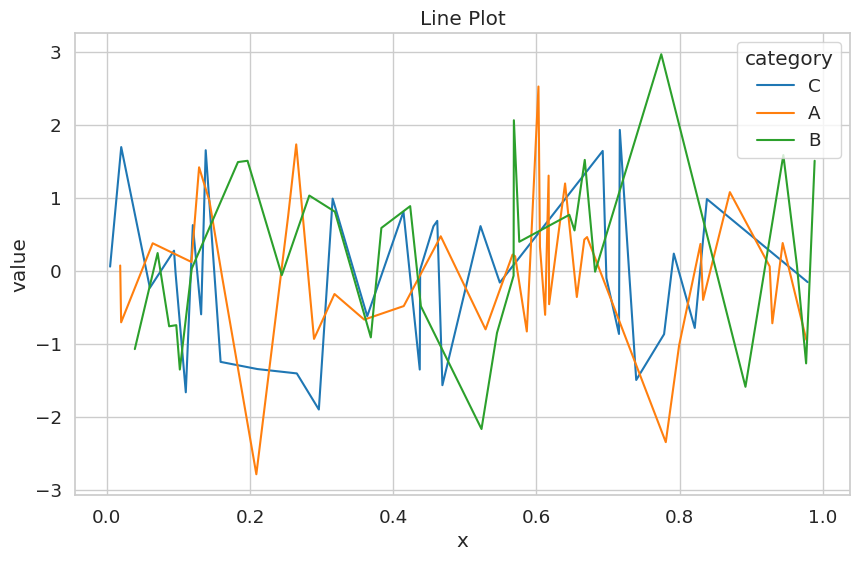

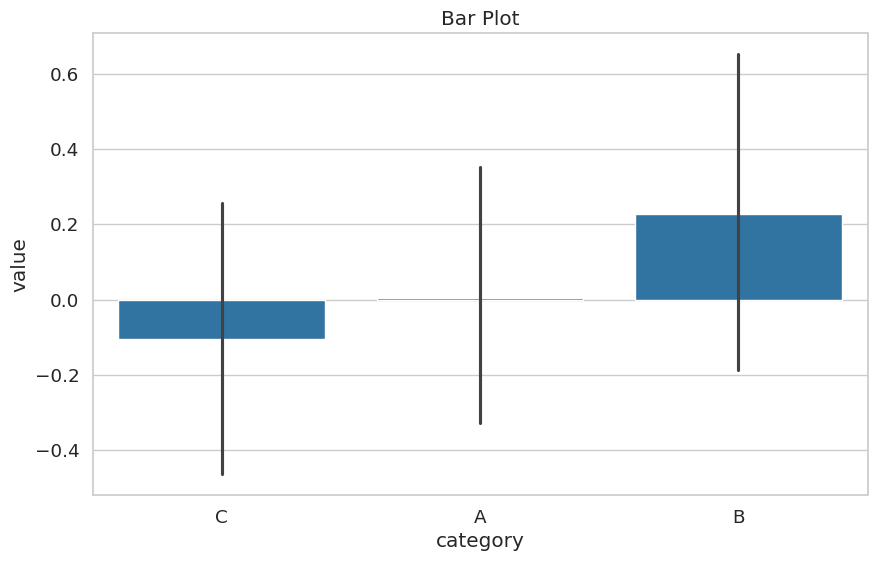

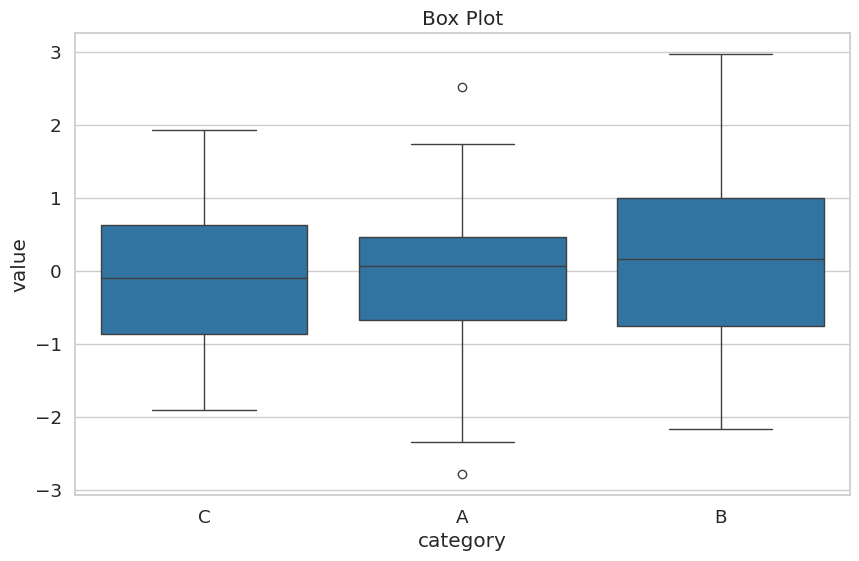

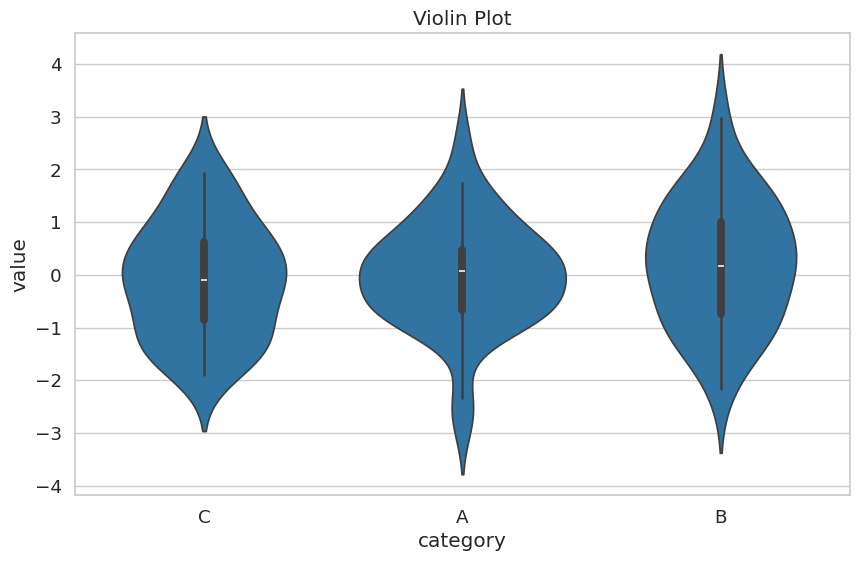

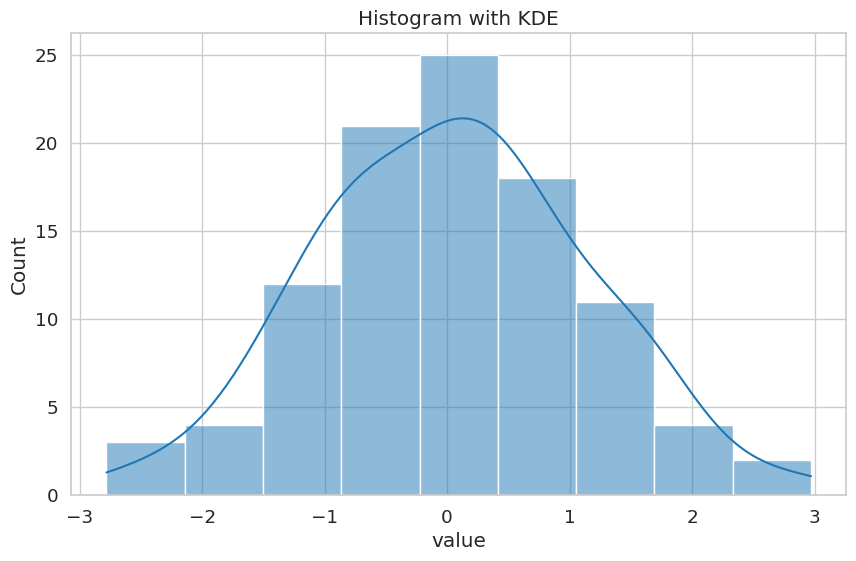

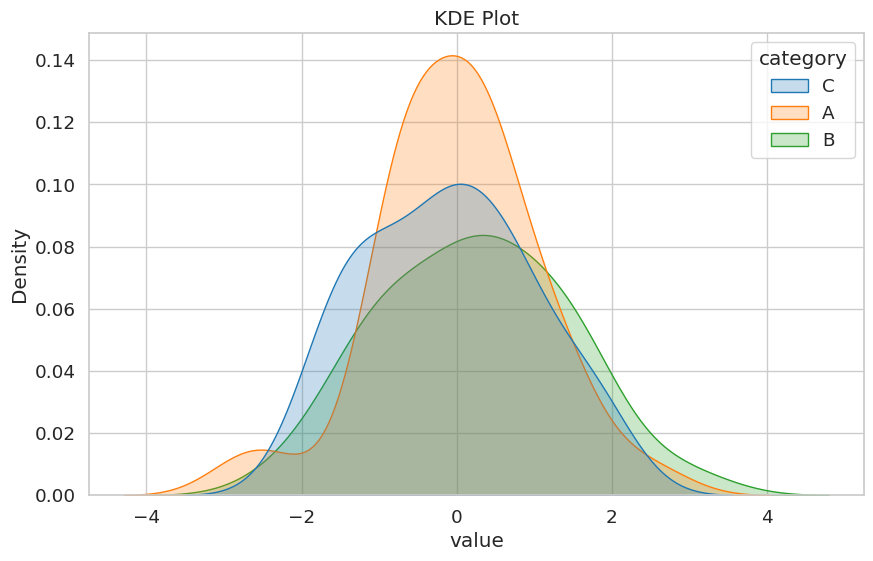

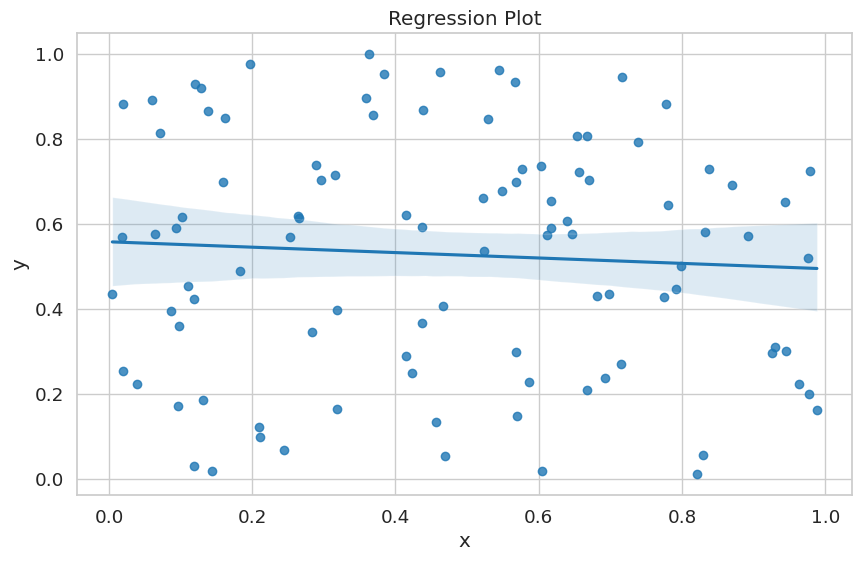

KeyboardInterrupt: 

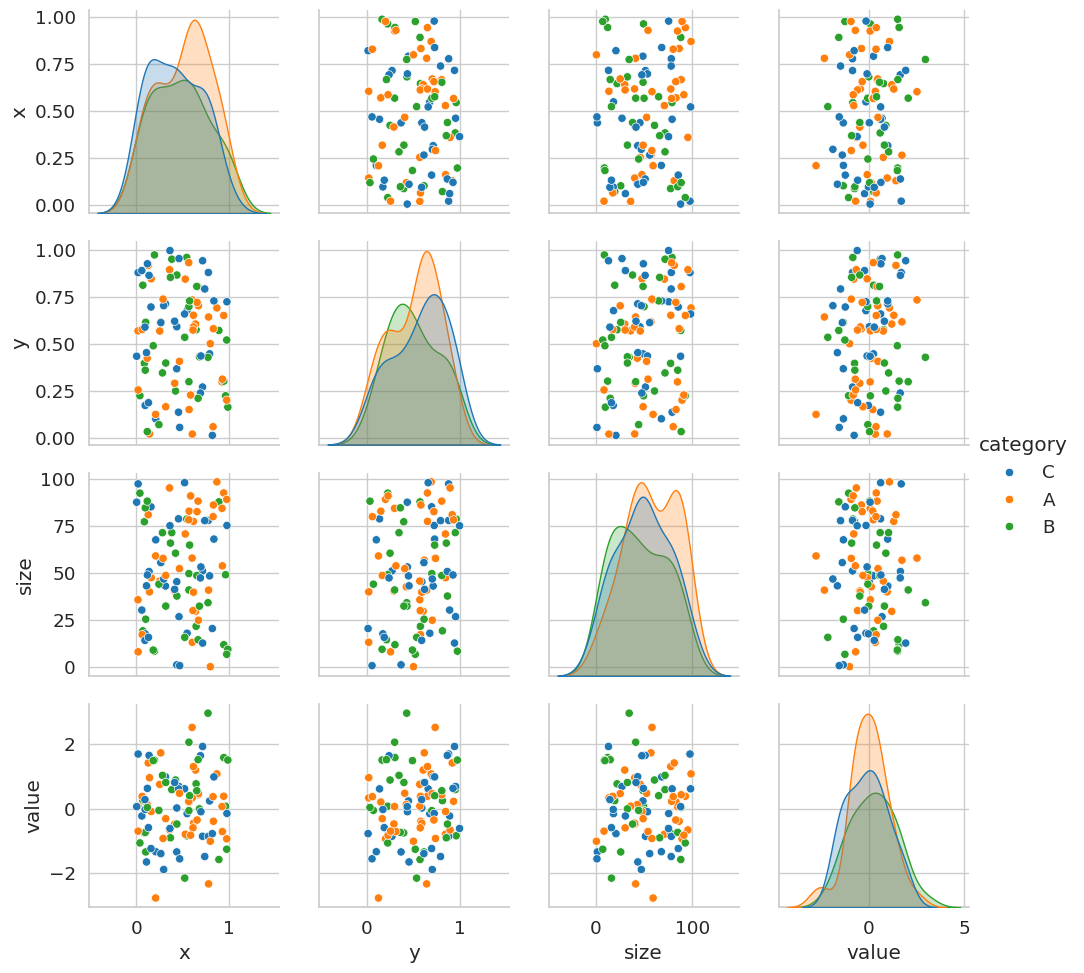

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for all plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a sample dataset
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'x': np.random.rand(n),
    'y': np.random.rand(n),
    'category': np.random.choice(['A', 'B', 'C'], n),
    'size': np.random.rand(n) * 100,
    'value': np.random.randn(n)
})
print(df)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='category', size='size', palette='deep', sizes=(20, 200))
plt.title('Scatter Plot')
plt.show()
# plt.savefig('seaborn_scatter.png')
plt.close()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='x', y='value', hue='category')
plt.title('Line Plot')
plt.show()
# plt.savefig('seaborn_line.png')
plt.close()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category', y='value')
plt.title('Bar Plot')
plt.show()
# plt.savefig('seaborn_bar.png')
plt.close()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='value')
plt.title('Box Plot')
plt.show()
# plt.savefig('seaborn_box.png')
plt.close()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='category', y='value')
plt.title('Violin Plot')
plt.show()
# plt.savefig('seaborn_violin.png')
plt.close()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='value', kde=True)
plt.title('Histogram with KDE')
plt.show()
# plt.savefig('seaborn_hist.png')
plt.close()

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='value', hue='category', fill=True)  # Replaced `shade=True` with `fill=True`
plt.title('KDE Plot')
plt.show()
# plt.savefig('seaborn_kde.png')
plt.close()

# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='x', y='y')
plt.title('Regression Plot')
plt.show()
# plt.savefig('seaborn_regplot.png')
plt.close()

# Pair plot
sns.pairplot(df, hue='category')
plt.suptitle('Pair Plot', y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
# plt.savefig('seaborn_pairplot.png')
plt.close()

# Heatmap
correlation = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()
# plt.savefig('seaborn_heatmap.png')
plt.close()

# FacetGrid
g = sns.FacetGrid(df, col="category", height=5, aspect=.8)
g.map(sns.scatterplot, "x", "y")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('FacetGrid')
plt.show()
# plt.savefig('seaborn_facetgrid.png')
plt.close()

# Joint plot
g = sns.jointplot(data=df, x="x", y="y", kind="reg")
g.fig.suptitle('Joint Plot', y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
# plt.savefig('seaborn_jointplot.png')
plt.close()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


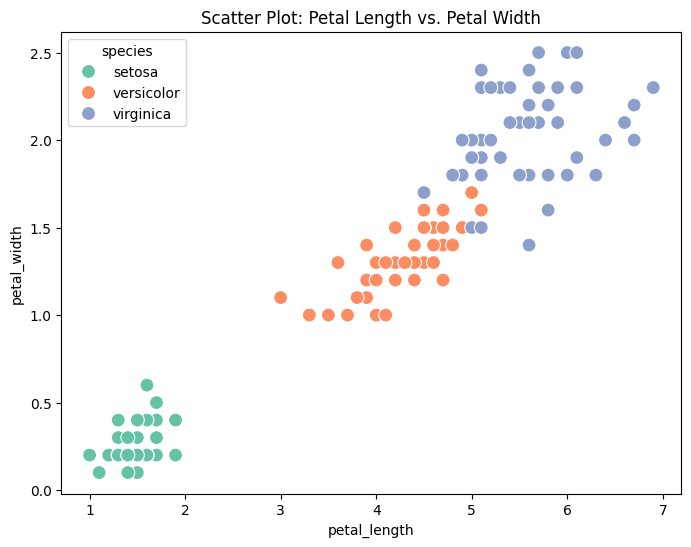

<ipython-input-75-2dac80b97494>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=df, palette='Set3')


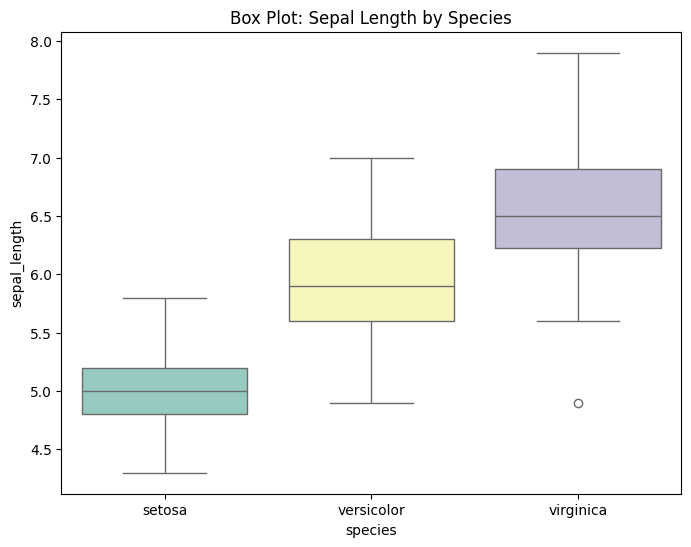

<ipython-input-75-2dac80b97494>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal_length', data=df, palette='Pastel1')


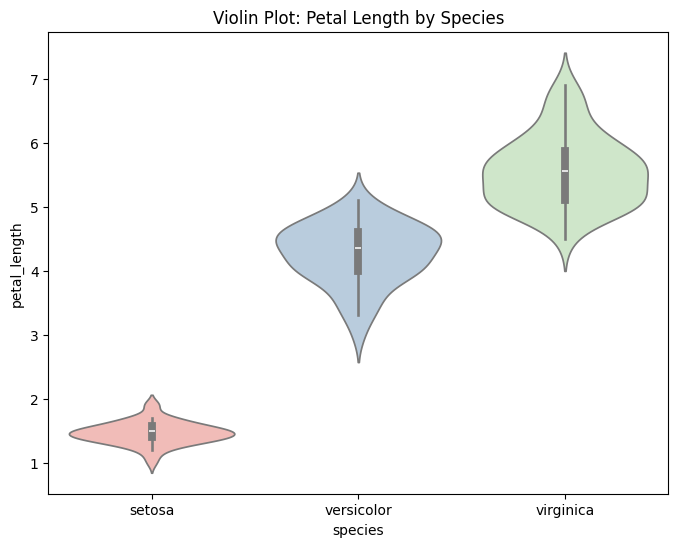

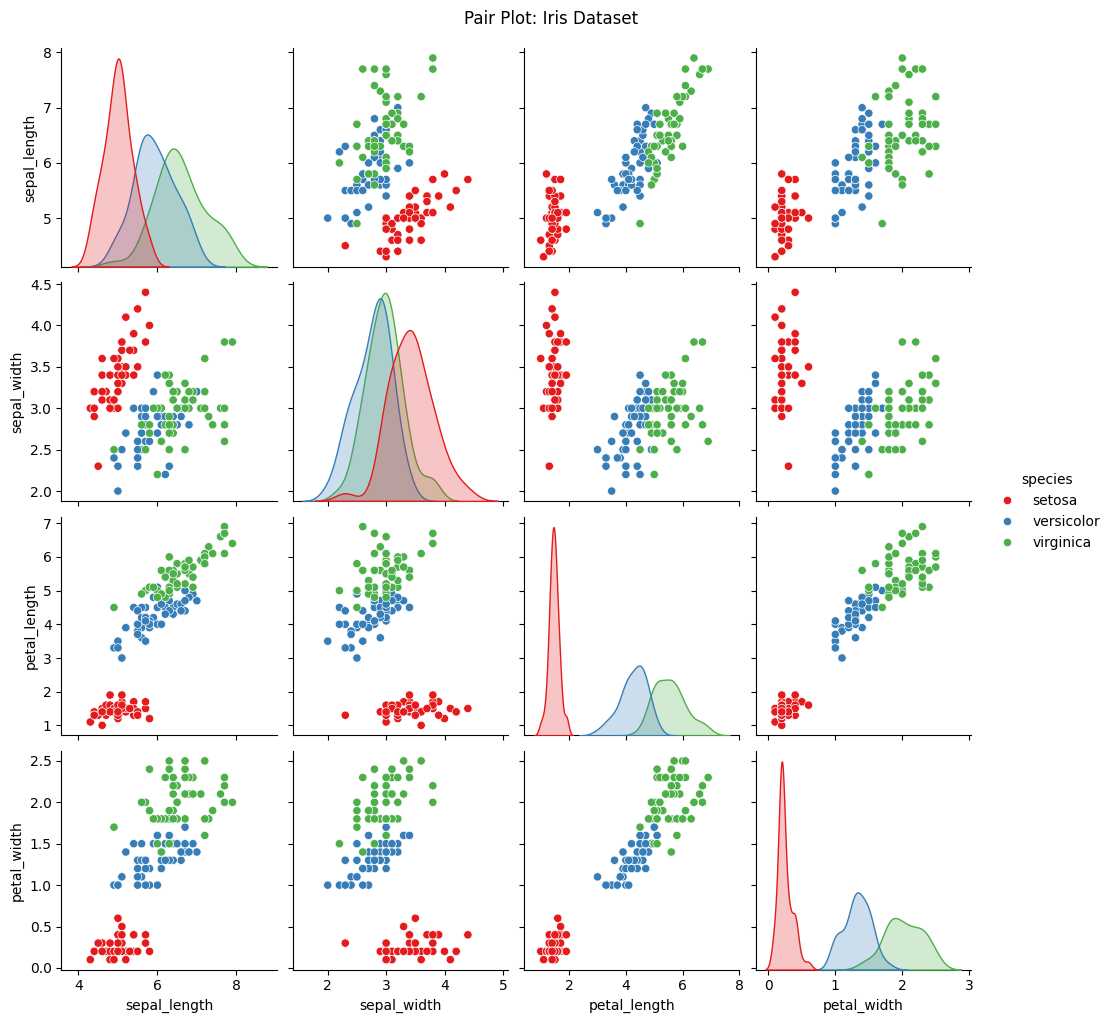

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
print(df.head())

# Scatter Plot: Petal Length vs. Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, palette='Set2', s=100)
plt.title('Scatter Plot: Petal Length vs. Petal Width')
plt.show()

# Box Plot: Sepal Length by Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set3')
plt.title('Box Plot: Sepal Length by Species')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_length', data=df, palette='Pastel1')
plt.title('Violin Plot: Petal Length by Species')
plt.show()

# Pair Plot
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle('Pair Plot: Iris Dataset', y=1.02)
plt.show()

###Assignment 2###

* Plot sales data for a year. Use Matplotlib for creating line plots and bar charts and pie charts.

* Generate Synthetic Data:

    * Create a list of months (e.g., January to December).

    * Generate synthetic sales data for each month (e.g., sales values between 50 and 500).

* Visualize the Data:

    * Line Plot:

        * Create a line plot showing the sales data over the months.

        * Add labels for the x-axis, y-axis, and a title to the plot.

    * Bar Chart:

         * Create a bar chart showing the sales data for each month.

         * Add labels for the x-axis, y-axis, and a title to the bar chart.

    * Violin Plot:

        * Create a violin plot to show the distribution of sales data across the months.

    Product-A  Product-B  Product-C      month
0          99         64         67    January
1          67         73         65   February
2          58         82         53      March
3          59         78         71      April
4          86         93         98        May
5          81         83        100       June
6          80        100         79       July
7          59         96         87     August
8          94         94         72  September
9          98         58         68    October
10         85         87         57   November
11         82         52         99   December
        month    Product  Value
0     January  Product-A     99
1    February  Product-A     67
2       March  Product-A     58
3       April  Product-A     59
4         May  Product-A     86
5        June  Product-A     81
6        July  Product-A     80
7      August  Product-A     59
8   September  Product-A     94
9     October  Product-A     98
10   November  Product-A     85
11   

<Figure size 800x600 with 0 Axes>

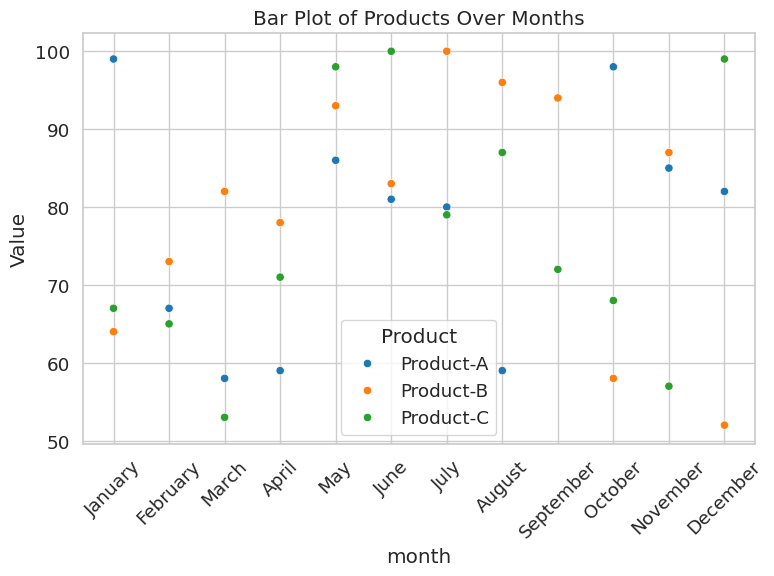

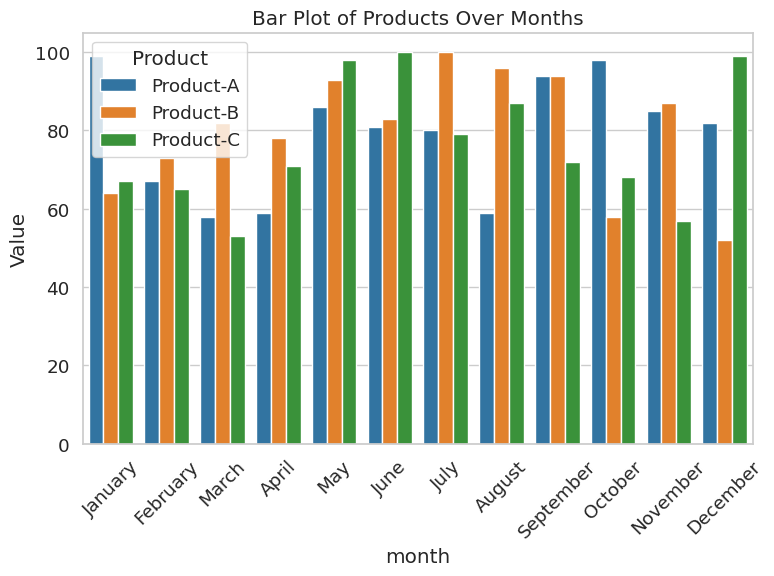

<ipython-input-102-b389f483fdff>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Product', y='Value', data=df_long, palette="Set2")


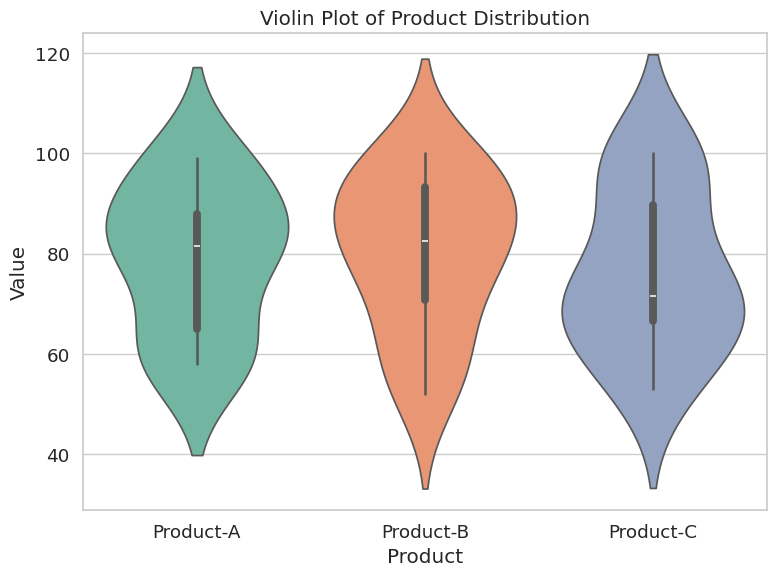

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import pandas as pd

no_of_products = 3
name_of_products = ['Product-'+chr(x+65) for x in range(no_of_products )]

data = {}
for product in name_of_products:
    data[product] = np.random.randint(low=50, high=101, size=12)

df = pd.DataFrame(data)

months = list(calendar.month_name)[1:]
df['month'] = months
print(df)

df_long = df.melt(id_vars='month', var_name='Product', value_name='Value')
print(df_long)

plt.figure(figsize=(8, 6))

# Scatter Plot
def plot_scatter():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='month', y='Value', hue='Product', data=df_long)
    plt.xticks(rotation=45)
    plt.title("Bar Plot of Products Over Months")
    plt.tight_layout()
    plt.show()

# Bar Plot
def plot_bar():
    plt.figure(figsize=(8, 6))
    sns.barplot(x='month', y='Value', hue='Product', data=df_long)
    plt.xticks(rotation=45)
    plt.title("Bar Plot of Products Over Months")
    plt.tight_layout()
    plt.show()

# Violin Plot
def plot_violin():
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Product', y='Value', data=df_long, palette="Set2")
    plt.title("Violin Plot of Product Distribution")
    plt.tight_layout()
    plt.show()


plot_scatter()
plot_bar()
plot_violin()

#Plotly#

Plotly is a powerful library for creating interactive, publication-quality graphs. It supports a wide range of chart types and can be used to create both static and interactive visualizations.

```python
import plotly.graph_objects as go
import plotly.express as px
```

### Core Concepts

#### Graph Objects vs. Express

- `plotly.graph_objects`: Low-level interface for fine-grained control
- `plotly.express`: High-level interface for quick and easy plotting

#### Figure and Layout

- `Figure`: The top-level object containing both data and layout information
- `Layout`: Controls the overall appearance of the plot

#### Traces

- Each trace represents a set of data and how it should be visualized

### Common Plotly Functions

#### Basic Plots

- `px.scatter(data_frame, x, y, color=None, size=None)`: Create a scatter plot
  - data_frame: DataFrame containing the data
  - x, y: Columns to be used for x and y axes
  - color, size: Columns for color and size encoding

- `px.line(data_frame, x, y, color=None)`: Create a line plot

- `px.bar(data_frame, x, y, color=None)`: Create a bar plot

#### Statistical Plots

- `px.box(data_frame, x, y, color=None)`: Create a box plot

- `px.violin(data_frame, x, y, color=None)`: Create a violin plot

- `px.histogram(data_frame, x, color=None, marginal=None)`: Create a histogram
  - marginal: Type of marginal plot (e.g., 'box', 'violin', 'rug')

#### 3D Plots

- `px.scatter_3d(data_frame, x, y, z, color=None)`: Create a 3D scatter plot

- `px.line_3d(data_frame, x, y, z, color=None)`: Create a 3D line plot

#### Maps

- `px.scatter_geo(data_frame, lat, lon, color=None)`: Create a scatter plot on a map
  - lat, lon: Columns containing latitude and longitude data

- `px.choropleth(data_frame, locations, color, locationmode=None)`: Create a choropleth map
  - locations: Column containing location identifiers
  - locationmode: Format of location identifiers (e.g., 'ISO-3', 'USA-states')

#### Other Plots

- `px.imshow(img)`: Display an image

- `px.density_heatmap(data_frame, x, y)`: Create a 2D histogram

#### Customization

- `fig.update_layout()`: Update the layout of the figure
- `fig.update_traces()`: Update the properties of all traces
- `fig.add_trace()`: Add a new trace to the figure

##Code Demonstration##

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Create a sample dataset
np.random.seed(0)
n = 1000
df = pd.DataFrame({
    'x': np.random.rand(n),
    'y': np.random.randn(n),
    'category': np.random.choice(['A', 'B', 'C'], n),
    'size': np.random.rand(n) * 20,
    'z': np.random.randn(n),
    'country': np.random.choice(['USA', 'Canada', 'Mexico'], n),
    'lat': np.random.uniform(25, 50, n),
    'lon': np.random.uniform(-125, -65, n)
})

# Scatter plot
fig = px.scatter(df, x='x', y='y', color='category', size='size', hover_data=['category'])
fig.show()
# fig.write_html("plotly_scatter.html")

# Line plot
fig = px.line(df, x='x', y='y', color='category')
fig.show()
# fig.write_html("plotly_line.html")

# Bar plot
fig = px.bar(df, x='category', y='y', color='category')
fig.show()
# fig.write_html("plotly_bar.html")

# Box plot
fig = px.box(df, x='category', y='y', color='category')

# fig.write_html("plotly_box.html")

# Violin plot
fig = px.violin(df, x='category', y='y', color='category', box=True)
fig.show()
# fig.write_html("plotly_violin.html")

# Histogram
fig = px.histogram(df, x='y', color='category', marginal='box')
fig.show()
# fig.write_html("plotly_histogram.html")

# 3D Scatter plot
fig = px.scatter_3d(df, x='x', y='y', z='z', color='category')
fig.show()
# fig.write_html("plotly_3d_scatter.html")

# Geo scatter plot
fig = px.scatter_geo(df, lat='lat', lon='lon', color='country', hover_name='country')
fig.show()
# fig.write_html("plotly_geo_scatter.html")

# Choropleth map
df_country = df.groupby('country').size().reset_index(name='counts')
fig = px.choropleth(df_country, locations='country', locationmode='country names', color='counts',
                    color_continuous_scale='Viridis', scope='north america')
fig.show()
# fig.write_html("plotly_choropleth.html")

# Density heatmap
fig = px.density_heatmap(df, x='x', y='y')
fig.show()
# fig.write_html("plotly_heatmap.html")

# Customized scatter plot using graph_objects
fig = go.Figure()

for category in df['category'].unique():
    df_cat = df[df['category'] == category]
    fig.add_trace(go.Scatter(
        x=df_cat['x'],
        y=df_cat['y'],
        mode='markers',
        name=category,
        marker=dict(size=df_cat['size'], sizemode='area', sizeref=2.*max(df['size'])/(40.**2)),
        text=df_cat['category'],
        hoverinfo='text+x+y'
    ))

fig.update_layout(
    title='Customized Scatter Plot',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    legend_title='Category',
    font=dict(family="Courier New, monospace", size=12, color="RebeccaPurple")
)
fig.show()
# fig.write_html("plotly_custom_scatter.html")

###Assignment

Visualizing Weather Data with Seaborn

* Part 1: Creating the Data

    * Dataset of weather data for a city over 20 days.

        * Day: Day of the month (1 to 20).

        * Temperature: Daily temperature in degrees Celsius (generate random floats between 15 and 30).

        * Humidity: Daily humidity percentage (generate random integers between 40 and 90).

* Instructions:

    * Use Python's random module to generate the data.

    * Store the data in a Pandas DataFrame.

* Part 2: Visualizing the Data with Seaborn

    * Line Plot: Temperature Over Days (20 days). Use Seaborn's lineplot function

    * Scatter Plot: Temperature vs. Humidity. Use Seaborn's scatterplot function

    * Box Plot: Daily Temperature. Use Seaborn's boxplot function

* Challenge (Optional):

    * Try using Seaborn's histplot to visualize the frequency distribution of humidity levels across the 20 days.

    * Convert this to read data from a csv file.

    Day  Temperatures  Humidity
0     0            15        75
1     1            20        44
2     2            15        73
3     3            25        55
4     4            17        58
5     5            29        82
6     6            22        77
7     7            24        54
8     8            26        44
9     9            20        59
10   10            24        46
11   11            21        43
12   12            25        77
13   13            16        80
14   14            15        50
15   15            21        76
16   16            23        61
17   17            19        69
18   18            21        78
19   19            24        61


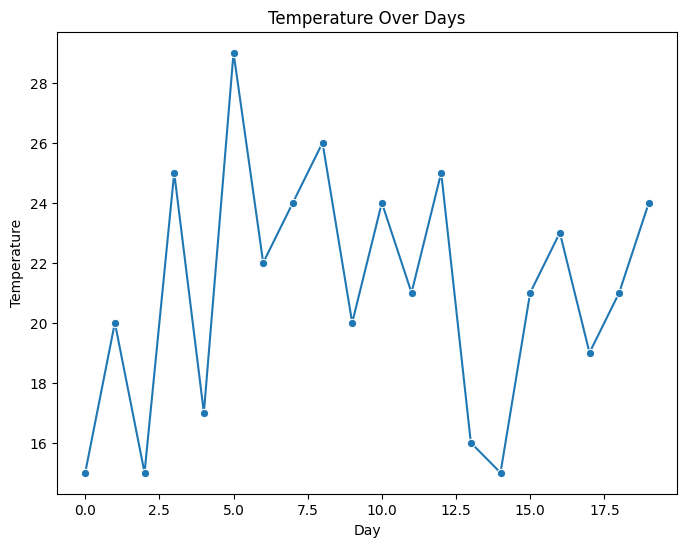

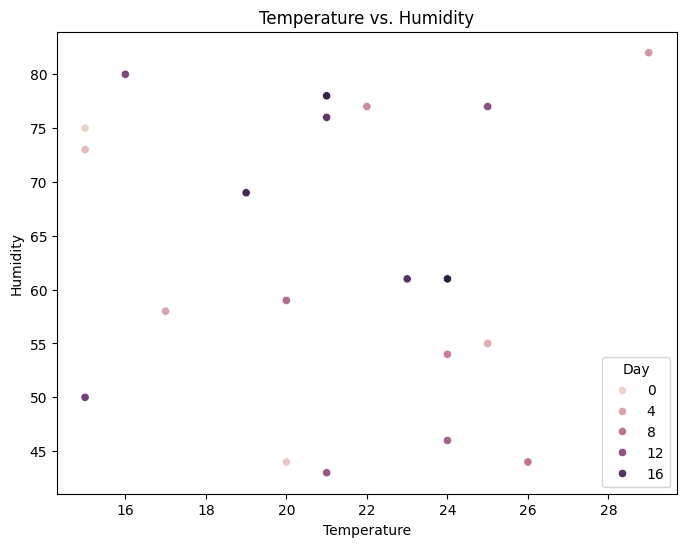

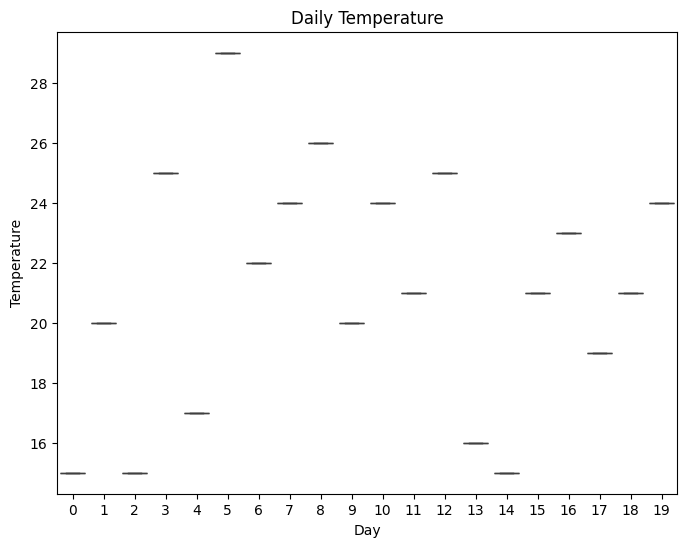

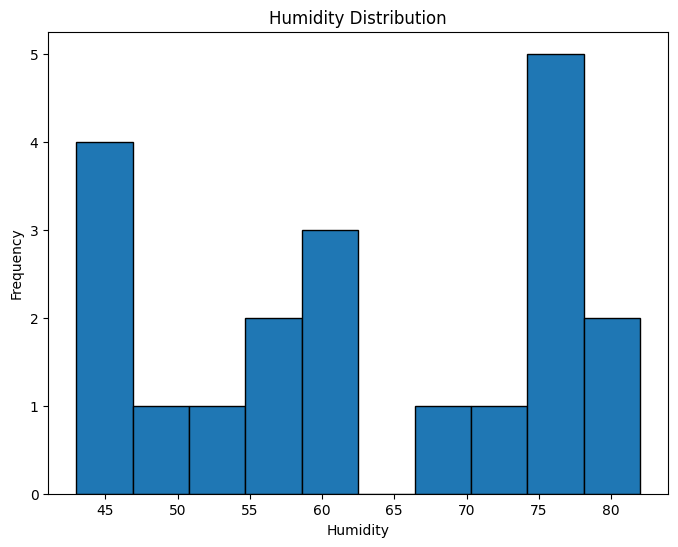

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar

no_of_days = 20
column = ['Day', 'Temperatures', 'Humidity']
data = {}

data[column[0]] = np.arange(no_of_days)
data[column[1]] = np.random.randint(low=15, high=30, size=no_of_days)
data[column[2]] = np.random.randint(low=40, high=90, size=no_of_days)

df = pd.DataFrame(data,index= data[column[0]], columns=column)


# Line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Day', y='Temperatures', marker='o')
plt.title('Temperature Over Days')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

# Scatte Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperatures', y='Humidity', hue='Day')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.show()


# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Day', y='Temperatures')
plt.title('Daily Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

# Hist plot
plt.figure(figsize=(8, 6))
plt.hist(df['Humidity'], bins=10, edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

* Assignment: Visualizing Titanic Dataset with Seaborn

    * Import Titanic dataset from Seaborn's built-in datasets. Inspect data by displaying first few rows.

* Create a Count Plot:

    * Use sns.countplot to create a count plot showing number of passengers who survived versus those who did not. Add appropriate labels and a title to the plot.

* Create a Box Plot:

    * Use sns.boxplot to create a box plot of passenger ages grouped by survival status (Survived or Not Survived). Ensure that each survival status us is is represented by a different color in the box plot.

* Create a Violin Plot:

    * Use sns.violinplot to create a violin plot of the fares paid, grouped by passenger class (Pclass). Add appropriate labels and a title to the plot.

* Create a Histogram:

    * Use sns.histplot to create a histogram of the ages of the passengers. Add a density plot to the histogram to visualize the distribution of ages.

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
   survived  counts
0         0     549
1         1     342


<ipython-input-9-a1c09a34a4e0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=titanic_df, palette='Set2',  ax=axes[0][1])
<ipython-input-9-a1c09a34a4e0>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='pclass', y='fare', data=titanic_df, palette='Set3',  ax=axes[1][0])


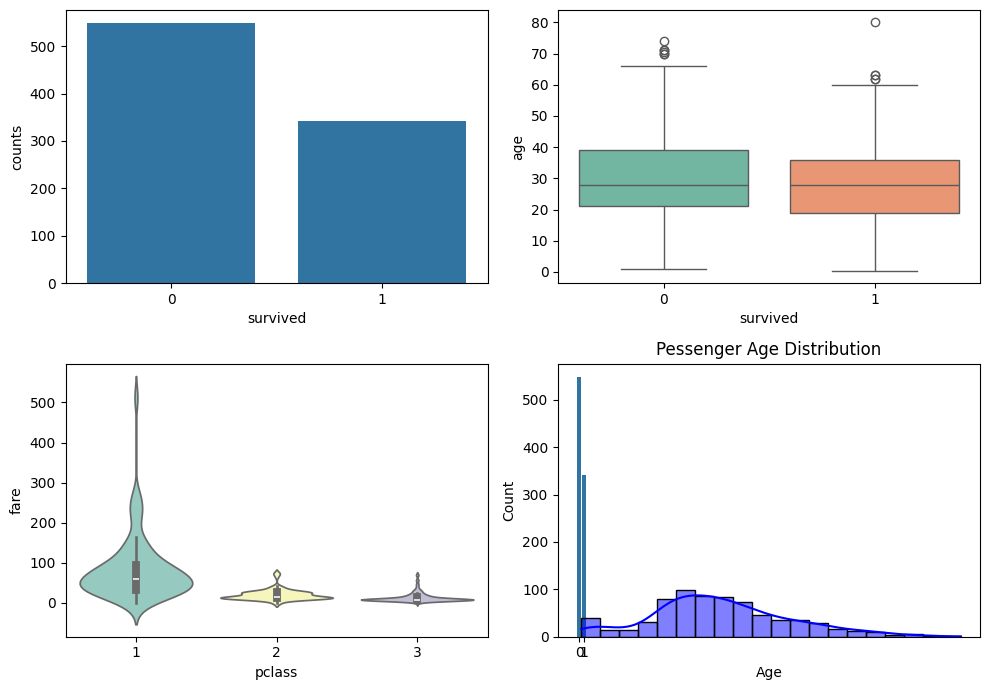

In [9]:
#@title { vertical-output: true}

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_df = sns.load_dataset('titanic')
print(titanic_df.head())


figure, axes = plt.subplots(2, 2, figsize=(10, 7))
# Count Plot
cat_df = titanic_df.groupby('survived').size().reset_index(name='counts')
print(cat_df)
sns.barplot(x='survived', y='counts', data=cat_df,  ax=axes[0][0])
sns.countplot(x='survived', data=titanic_df)
plt.title('Survivres vs Count')
plt.title('Survived vs Not Survived')
plt.ylabel('Count')




# Box Plot
sns.boxplot(x='survived', y='age', data=titanic_df, palette='Set2',  ax=axes[0][1])
plt.title('Passenger Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')


# Violin Plot
sns.violinplot(x='pclass', y='fare', data=titanic_df, palette='Set3',  ax=axes[1][0])
plt.title('Fare Distribuition by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

# Histogram
sns.histplot(titanic_df['age'].dropna(), kde=True, color='blue',  ax=axes[1][1])
plt.title('Pessenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
